In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
london = pd.read_csv(r"C:\Users\user\Desktop\london.csv") #Читаем датафрэйм
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
london.shape #Смотрим количество наблюдений

(17414, 10)

In [ ]:
london.isna().sum() #Проверяем на наличие пропущенных значений

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
london.dtypes #Проверяем типы данных

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [ ]:
london.timestamp = pd.to_datetime(london.timestamp) #Приводим колонку с атой и временем к нужному формату
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

<Axes: xlabel='timestamp', ylabel='cnt'>

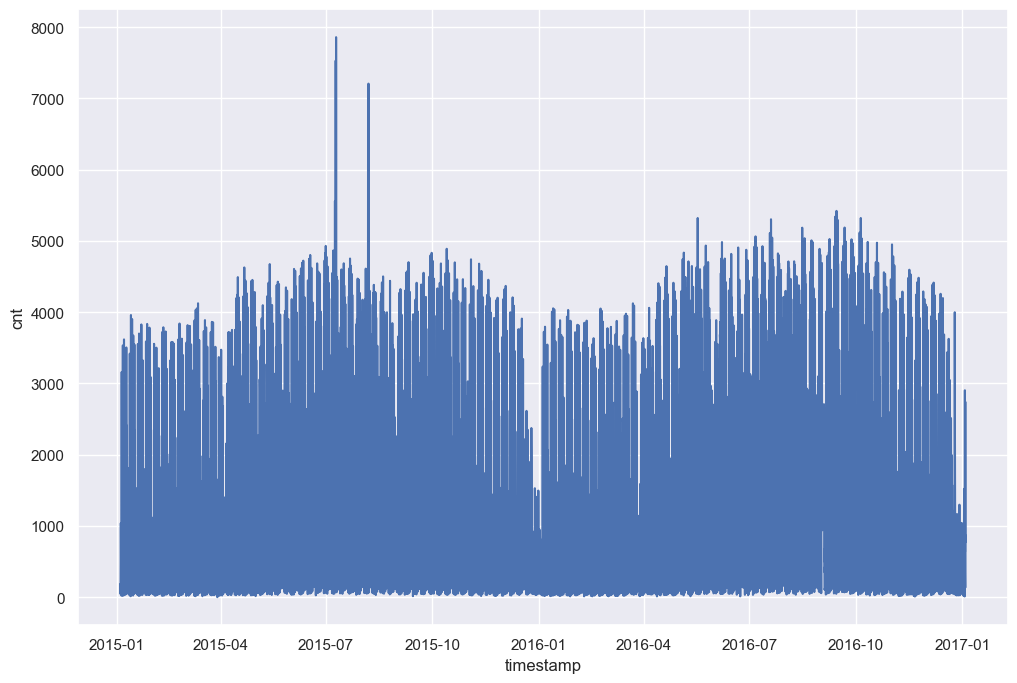

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.lineplot(x = 'timestamp', y = 'cnt', data = london) #Строим график распределения, количества поездок

In [ ]:
london.sort_values(by = 'timestamp', inplace = True)
london.set_index('timestamp', drop = False, inplace = True) #Сортируем и пересоздаём индексы в виде даты

In [23]:
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='timestamp'>

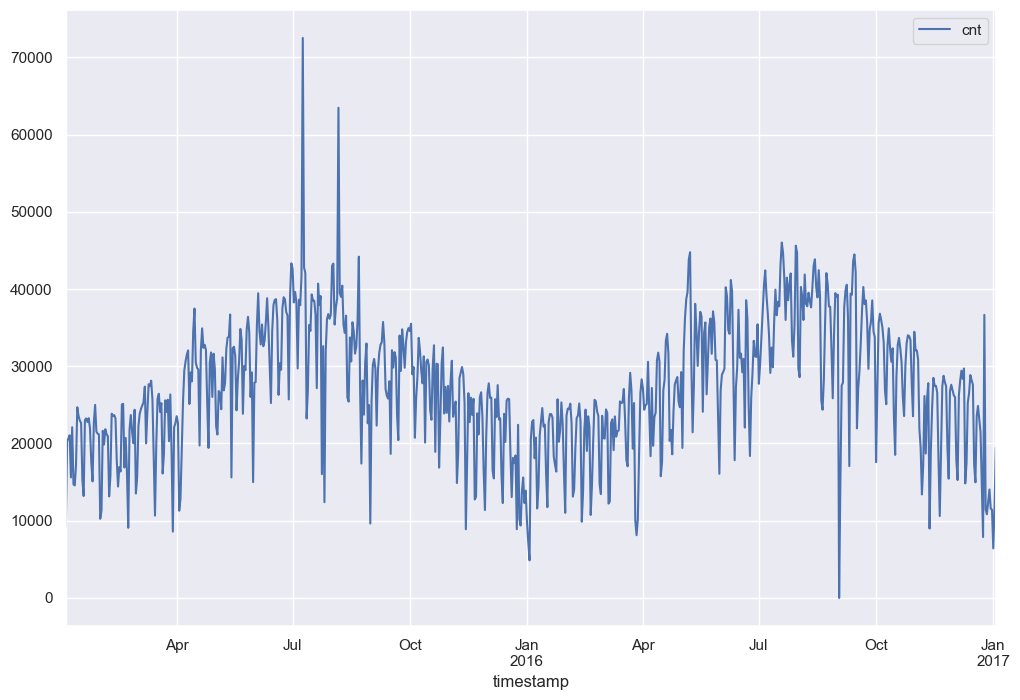

In [ ]:
london.resample('D').agg({'cnt':'sum'}).plot() #Агрегируем количество поездок по дням и строим новое распределение

In [ ]:
cnt_by_day = london.resample('D').cnt.sum().reset_index() #Записываем полученное в датафрэйм


In [ ]:
cnt_by_day_rol3 = london.resample('D').cnt.sum().rolling(3).mean().reset_index() #Считаем скользящее среднее с окном 3
cnt_by_day_rol3.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [ ]:
np.std(cnt_by_day['cnt'] - cnt_by_day_rol3['cnt'])
std = np.std(cnt_by_day['cnt'] - cnt_by_day_rol3['cnt']) #Считаем стандартное отклонение

In [ ]:
upper = cnt_by_day_rol3.cnt + (2.576*std)
lower = cnt_by_day_rol3.cnt - (2.576*std) #Считаем доверительные интервалы

In [ ]:
cnt_by_day['upper_bound'] = upper #Вносим доверительные интервалы в датафрэйм
cnt_by_day['lower_bound'] = lower
cnt_by_day.head()

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479


In [ ]:
cnt_by_day[cnt_by_day.cnt > cnt_by_day.upper_bound] #Ищем дни, в которые количество поездок превысило верхний доверительный интервал

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


In [ ]:
cnt_by_day[cnt_by_day.cnt < cnt_by_day.lower_bound] #Ищем дни, в которые количество поездок превысило нижний доверительный интервал

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812
